In [1]:
# Importing Required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
import datetime
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
prod_t_df = pd.read_csv('pt.csv',low_memory=False)

In [25]:
# Selecting RingFrame Machines in Code 'C'
unit_code = 'C'

prod_df = prod_t_df[prod_t_df['pt_ucode']== unit_code]
prod_df = prod_t_df[['pt_date','pt_count','pt_mcode','pt_hanks','pt_dlvrs','pt_stdhnk','pt_nomhnk','pt_idlespnper','pt_tc','pt_crsec','pt_ssdur','pt_lsdur','pt_stdgpss']]
prod_df =  prod_df[prod_df.pt_date.str.contains('2018$')]
prod_df = prod_df [prod_df.pt_mcode.str.contains('^RF')] 
prod_df['pt_date'] =pd.to_datetime(prod_df.pt_date)
prod_df = prod_df.sort_values(by='pt_date')
prod_df.head(5)

,pt_date,pt_count,pt_mcode,pt_hanks,pt_dlvrs,pt_stdhnk,pt_nomhnk,pt_idlespnper,pt_tc,pt_crsec,pt_ssdur,pt_lsdur,pt_stdgpss
26609,2018-01-01,55sRWT,RF-77,13.819457,960,13.787235,57.5,0.0,1.89,30600,0,1545,100.63
259693,2018-01-01,50 CK,RF-21,10.585412,960,10.749946,49.0,0.0,2.33,25200,0,525,107.12
87409,2018-01-01,50 CK,RF-26,12.303800,960,13.260881,49.0,0.0,2.33,30600,0,150,107.12
8054,2018-01-01,50 CK,RF-26,12.563203,960,13.339348,49.0,0.0,2.33,30600,0,0,107.12
215304,2018-01-01,48sRWT,RF-79,14.369532,960,15.740740,48.5,0.0,1.90,30600,0,90,130.51


In [27]:
#Calculating Standard Production
prod_df['std_prod'] = (0.4536*prod_df['pt_stdhnk']*prod_df['pt_dlvrs'])/(prod_df['pt_nomhnk'])
prod_df.head(5)

,pt_date,pt_count,pt_mcode,pt_hanks,pt_dlvrs,pt_stdhnk,pt_nomhnk,pt_idlespnper,pt_tc,pt_crsec,pt_ssdur,pt_lsdur,pt_stdgpss,std_prod
26609,2018-01-01,55sRWT,RF-77,13.819457,960,13.787235,57.5,0.0,1.89,30600,0,1545,100.63,104.412769
259693,2018-01-01,50 CK,RF-21,10.585412,960,10.749946,49.0,0.0,2.33,25200,0,525,107.12,95.533234
87409,2018-01-01,50 CK,RF-26,12.303800,960,13.260881,49.0,0.0,2.33,30600,0,150,107.12,117.847555
8054,2018-01-01,50 CK,RF-26,12.563203,960,13.339348,49.0,0.0,2.33,30600,0,0,107.12,118.544880
215304,2018-01-01,48sRWT,RF-79,14.369532,960,15.740740,48.5,0.0,1.90,30600,0,90,130.51,141.327828


In [28]:
# Calculating Actual Production
prod_df['act_prod'] =  ((0.4536*prod_df['pt_hanks']*prod_df['pt_dlvrs'])/(prod_df['pt_nomhnk']))*((100-prod_df['pt_tc'])/100)
prod_df.head(5)

,pt_date,pt_count,pt_mcode,pt_hanks,pt_dlvrs,pt_stdhnk,pt_nomhnk,pt_idlespnper,pt_tc,pt_crsec,pt_ssdur,pt_lsdur,pt_stdgpss,std_prod,act_prod
26609,2018-01-01,55sRWT,RF-77,13.819457,960,13.787235,57.5,0.0,1.89,30600,0,1545,100.63,104.412769,102.678778
259693,2018-01-01,50 CK,RF-21,10.585412,960,10.749946,49.0,0.0,2.33,25200,0,525,107.12,95.533234,91.879189
87409,2018-01-01,50 CK,RF-26,12.303800,960,13.260881,49.0,0.0,2.33,30600,0,150,107.12,117.847555,106.794438
8054,2018-01-01,50 CK,RF-26,12.563203,960,13.339348,49.0,0.0,2.33,30600,0,0,107.12,118.544880,109.046005
215304,2018-01-01,48sRWT,RF-79,14.369532,960,15.740740,48.5,0.0,1.90,30600,0,90,130.51,141.327828,126.565156


In [6]:
#Calculating Production Efficiency
prod_df['prod_eff'] = (prod_df['act_prod']/prod_df['std_prod'])*100
prod_df.head(5)

,pt_date,pt_count,pt_mcode,pt_hanks,pt_dlvrs,pt_stdhnk,pt_nomhnk,pt_idlespnper,pt_tc,pt_crsec,pt_ssdur,pt_lsdur,pt_stdgpss,std_prod,act_prod,prod_eff
26609,2018-01-01,55sRWT,RF-77,13.819457,960,13.787235,57.5,0.0,1.89,30600,0,1545,100.63,104.412769,102.678778,98.339293
259693,2018-01-01,50 CK,RF-21,10.585412,960,10.749946,49.0,0.0,2.33,25200,0,525,107.12,95.533234,91.879189,96.175105
87409,2018-01-01,50 CK,RF-26,12.303800,960,13.260881,49.0,0.0,2.33,30600,0,150,107.12,117.847555,106.794438,90.620835
8054,2018-01-01,50 CK,RF-26,12.563203,960,13.339348,49.0,0.0,2.33,30600,0,0,107.12,118.544880,109.046005,91.987107
215304,2018-01-01,48sRWT,RF-79,14.369532,960,15.740740,48.5,0.0,1.90,30600,0,90,130.51,141.327828,126.565156,89.554306


In [7]:
#Calculating Run Duration
prod_df['run_dur'] = prod_df['pt_crsec']-(prod_df['pt_ssdur']+prod_df['pt_lsdur'])
prod_df.head()

,pt_date,pt_count,pt_mcode,pt_hanks,pt_dlvrs,pt_stdhnk,pt_nomhnk,pt_idlespnper,pt_tc,pt_crsec,pt_ssdur,pt_lsdur,pt_stdgpss,std_prod,act_prod,prod_eff,run_dur
26609,2018-01-01,55sRWT,RF-77,13.819457,960,13.787235,57.5,0.0,1.89,30600,0,1545,100.63,104.412769,102.678778,98.339293,29055
259693,2018-01-01,50 CK,RF-21,10.585412,960,10.749946,49.0,0.0,2.33,25200,0,525,107.12,95.533234,91.879189,96.175105,24675
87409,2018-01-01,50 CK,RF-26,12.303800,960,13.260881,49.0,0.0,2.33,30600,0,150,107.12,117.847555,106.794438,90.620835,30450
8054,2018-01-01,50 CK,RF-26,12.563203,960,13.339348,49.0,0.0,2.33,30600,0,0,107.12,118.544880,109.046005,91.987107,30600
215304,2018-01-01,48sRWT,RF-79,14.369532,960,15.740740,48.5,0.0,1.90,30600,0,90,130.51,141.327828,126.565156,89.554306,30510


In [8]:
#Calculating Utilisation and Stop Duration
prod_df['util'] = prod_df['run_dur']/prod_df['pt_crsec']
prod_df['stop_dur'] = prod_df['pt_lsdur']+prod_df['pt_ssdur']

In [9]:
# Reading Machine Master
mm_df = pd.read_csv('mm.csv',low_memory=False)
mm_df.set_index('mm_mcode',inplace = True)

In [10]:
# Calculating Working Spinldes
w_spnd=[]
for index, row in prod_df.iterrows():
    w_spnd.append(mm_df.loc[row['pt_mcode']]['mm_dlvrs']) 
prod_df['w_spindles'] = w_spnd
prod_df['w_spindles'] = ((prod_df['pt_crsec'] - prod_df['stop_dur'])*prod_df['w_spindles'])/prod_df['pt_crsec']

In [11]:
#Calculating Actual GPSS
prod_df['act_gpss'] = (prod_df['act_prod']*28800*1000)/(prod_df['w_spindles']*prod_df['pt_crsec'])

In [12]:
#Saving the dataframe as CSV
prod_df.to_csv('calculated.csv')

In [13]:
months = []
for i in range(1,13):
    month = datetime.date(1900,i, 1).strftime('%B')
    months.append(month)
df_t = pd.DataFrame(months, columns = ['months']) 
df_t

,months
0,January
1,February
2,March
3,April
4,May
5,June
6,July
7,August
8,September
9,October


In [14]:
# Production vs Count Graph
codes = (prod_df['pt_count'].unique())
for code in codes:
    monthly_data = []
    prod_df_t = prod_df[prod_df['pt_count'] ==  code]
    grouped = prod_df_t.groupby('pt_date', as_index=False)
    grouped = grouped['act_prod'].agg(np.sum)
    for i in range(1,13):
        mon_grouped_flags = grouped['pt_date'].map(lambda x: x.month) == i
        mon_grouped = grouped[mon_grouped_flags]
        monthly_data.append(sum(mon_grouped['act_prod']))
    df_t[code]=monthly_data
df_t.index = months
df_t.drop(['months'], axis=1, inplace=True)
df_t

,55sRWT,50 CK,48sRWT,42sRWT,55sOPT,50s CKC,60s CWCP-S,63sRWT,60sRWT,60s OPT,...,48sOPT,60s CKC,42s CKC,60 CW,50s CH5*,50PST,60s CH5* - S,60s CK,60s CH5* - P,45s CKC
January,50448.945242,191832.799057,30400.063702,36944.183054,4879.944834,136915.660085,13172.671207,8573.816511,10931.412919,5655.065390,...,1624.417956,3358.194880,7270.381626,2338.879895,4997.244068,4375.895415,6916.774612,13494.146861,8595.458932,2018.725606
February,57703.614476,177768.812159,34846.222296,52525.931399,6788.922019,111943.271318,10046.083506,3782.274700,10810.367152,7933.758437,...,6174.103445,12531.708138,8918.750263,3840.338495,5758.169830,4725.298457,6541.423510,13343.786379,8247.898723,2025.247824
March,43965.876922,163967.578458,33979.357075,47110.862479,6726.052268,51681.048847,1762.527489,6528.537474,15503.427981,4611.772021,...,6068.169075,30981.675929,34459.147929,24983.178766,21230.630902,5702.235380,7227.420831,14121.623845,8828.749887,2060.278840
April,59559.769304,178302.448552,40863.837867,46402.024667,15595.740596,60748.100666,1626.139390,8903.605517,11912.008097,2801.079867,...,2910.674149,37249.260032,39300.772359,29691.348672,22964.764896,6190.875334,6910.533711,13699.939578,8509.126980,2088.864380
May,57590.871887,150582.634192,25445.130764,39074.983466,13802.779319,52840.500709,1748.944641,9830.621240,11033.241310,5374.211613,...,1968.981080,32649.319822,33791.806471,25519.637800,19084.047054,10015.265671,5892.022134,12168.271507,7445.654052,2073.364831
June,54871.298656,134211.998017,46652.459123,38774.675208,8168.617374,62112.884852,1723.894653,13040.632448,18487.765648,2065.311370,...,8238.478725,4147.390797,7455.414549,2871.023684,16436.494977,10837.492011,20707.571588,70473.060263,24240.964190,37830.944921
July,65291.248571,138072.850457,58744.187171,34295.986747,17710.485634,60130.417257,1453.217816,11129.845649,8865.342380,6129.244082,...,1955.445183,6072.511080,44253.974285,4979.429294,18483.909888,12233.108388,24295.689202,81727.843384,26842.347612,7709.426424
August,77929.388749,167708.919507,48520.082857,30449.124915,8706.567590,53557.961616,1115.240769,7287.331974,9091.382378,1445.769752,...,2017.256478,6976.349455,22209.192251,5817.458989,15633.326199,24804.773925,28428.317965,63887.523652,33927.928962,2076.797780
September,62619.518353,181341.206520,38908.706591,39678.297023,9637.726169,51184.770007,1334.016755,5395.533872,6293.251552,5755.230101,...,2172.291641,6951.785350,18454.474082,5746.933425,12411.652909,23043.353699,28591.199163,48944.625256,32936.001437,1083.086552
October,76227.268220,199826.552323,41978.581567,40597.026009,6081.678496,53818.420379,1262.842716,2596.097831,8912.703641,1886.125716,...,5699.058959,6371.633025,9811.441597,4908.008387,16792.110325,23962.695553,28236.506792,34580.072267,31311.087190,2602.978529


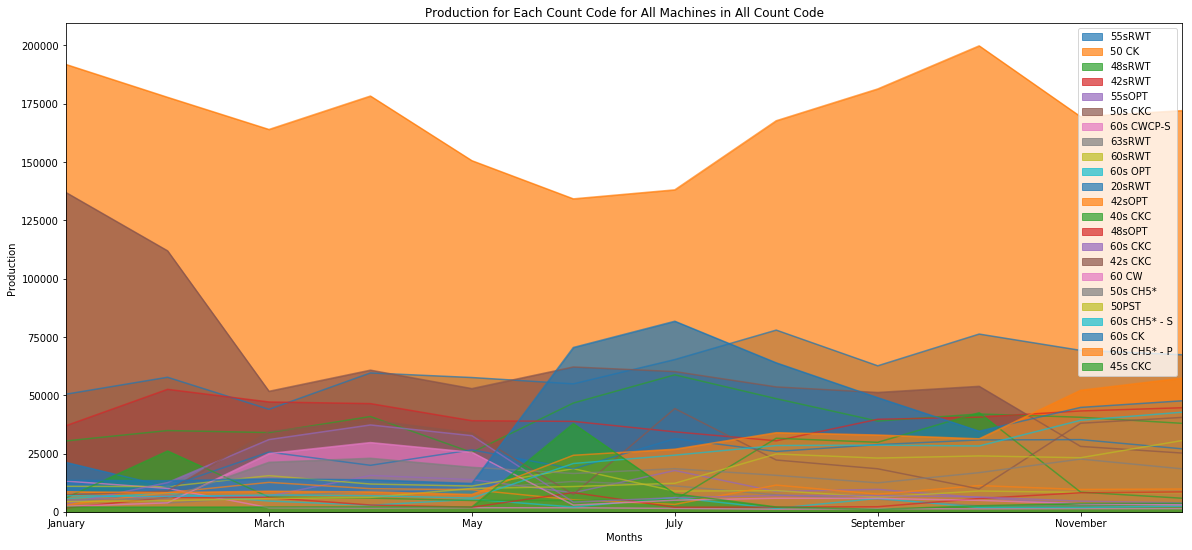

In [15]:
df_t.plot(kind='area', alpha=0.7, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 9), # pass a tuple (x, y) size
            ) 
plt.title('Production for Each Count Code for All Machines in All Count Code')
plt.ylabel('Production')
plt.xlabel('Months')
plt.show()

In [16]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = []
for code in codes:
    data.append(go.Scatter(
    x=months,
    y=list(df_t[code]),
    fill='tozeroy',
    mode= 'none',
    name = code
    ))
layout = go.Layout( 
    title='<b>ALL COUNT GRAPH</b>',
    xaxis=dict(title='Months in 2018',),
    yaxis=dict(title='Production in Kg',)
)
fig = go.Figure(data=data, layout=layout)
plot(fig, filename='Production.html')

'Production.html'

In [29]:
grouped = prod_df.groupby('pt_mcode', as_index=False)
grouped = grouped['std_prod','act_prod'].agg(np.sum)

In [30]:
grouped['pt_mcode'].unique()

array(['RF-01', 'RF-02', 'RF-03', 'RF-04', 'RF-05', 'RF-06', 'RF-07',
       'RF-08', 'RF-09', 'RF-10', 'RF-11', 'RF-12', 'RF-13', 'RF-14',
       'RF-15', 'RF-16', 'RF-17', 'RF-18', 'RF-19', 'RF-20', 'RF-21',
       'RF-22', 'RF-23', 'RF-24', 'RF-25', 'RF-26', 'RF-27', 'RF-28',
       'RF-29', 'RF-30', 'RF-31', 'RF-32', 'RF-33', 'RF-34', 'RF-35',
       'RF-36', 'RF-37', 'RF-38', 'RF-39', 'RF-40', 'RF-41', 'RF-42',
       'RF-43', 'RF-44', 'RF-45', 'RF-46', 'RF-47', 'RF-48', 'RF-61',
       'RF-62', 'RF-63', 'RF-64', 'RF-65', 'RF-66', 'RF-67', 'RF-68',
       'RF-69', 'RF-70', 'RF-71', 'RF-72', 'RF-73', 'RF-74', 'RF-75',
       'RF-76', 'RF-77', 'RF-78', 'RF-79', 'RF-80', 'RF-81', 'RF-82',
       'RF-83', 'RF-84'], dtype=object)